In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/maira/OneDrive/Desktop/Kaggle Project/train.csv")
print(data.info())      # Check the basic information
data = data.drop(columns="id")
y = data['answer']
X = data.drop('answer', axis=1)
print(data.describe())      # Display basic statistical details
print(data.columns)
print(data.isnull().sum())    # Check for missing values
counts = y.value_counts()
print(counts)

c:\Users\maira\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\maira\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\maira\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# Analyze the mean length of text in each text column
text_columns = X.columns

for column in text_columns:
    X[f'{column}_length'] = X[column].apply(len)
    print(f'Average length of text in column {column}: {X[f"{column}_length"].mean()}')

Average length of text in column prompt: 72.265
Average length of text in column A: 162.535
Average length of text in column B: 164.295
Average length of text in column C: 165.305
Average length of text in column D: 160.615
Average length of text in column E: 162.105


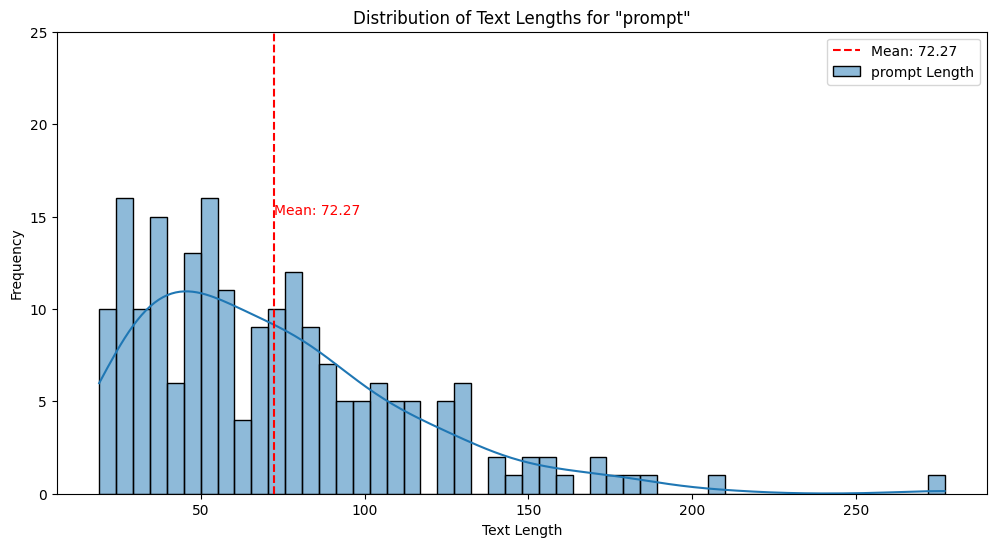

In [5]:
X['prompt_length'] = X['prompt'].apply(len)           # Calculate the length of the text in the "prompt" column
mean_length = X['prompt_length'].mean()               # Calculate mean
plt.figure(figsize=(12, 6))                           # Create the plot

sns.histplot(X['prompt_length'], bins=50, kde=True, label='prompt Length')    # Plot the histogram and KDE for the "prompt_length"

plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.2f}')  # Plot mean

plt.text(mean_length, plt.ylim()[1]*0.9, f'Mean: {mean_length:.2f}', color='red')        # Annotate the mean  on the graph

plt.title('Distribution of Text Lengths for "prompt"')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.ylim(0, 25)
plt.legend()

plt.show()


In [7]:
row = data.iloc[0]                # Pick first row from the dataset
print(row)
# Create "prompt"
system_message = """You are an expert in scientific knowledge. Answer the following multiple-choice question by providing the most correct 
                    or most likely answer from the options provided. Answer format: single letter (A, B, C, D, or E)."""
print(system_message)
user_message = f"""
Question: {row['prompt']}
A: {row['A']}
B: {row['B']}
C: {row['C']}
D: {row['D']}
E: {row['E']}
Answer (provide only the letter):
"""
print(user_message)

final_prompt = f"{system_message}\n\n{user_message}"

prompt    Which of the following statements accurately d...
A         MOND is a theory that reduces the observed mis...
B         MOND is a theory that increases the discrepanc...
C         MOND is a theory that explains the missing bar...
D         MOND is a theory that reduces the discrepancy ...
E         MOND is a theory that eliminates the observed ...
answer                                                    D
Name: 0, dtype: object
You are an expert in scientific knowledge. Answer the following multiple-choice question by providing the most correct 
                    or most likely answer from the options provided. Answer format: single letter (A, B, C, D, or E).

Question: Which of the following statements accurately describes the impact of Modified Newtonian Dynamics (MOND) on the observed "missing baryonic mass" discrepancy in galaxy clusters?
A: MOND is a theory that reduces the observed missing baryonic mass in galaxy clusters by postulating the existence of a new form of

In [8]:
prompt_length = len(final_prompt)               # Calculate the length of the prompt
# Estimate the number of tokens (1 token ≈ 4 characters)
approx_tokens = prompt_length / 4

prompt_length, approx_tokens

(1420, 355.0)

In [9]:
import openai
import os
openai.api_key = 'API'

In [11]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_message}
    ]
)
predicted_answer = response['choices'][0]['message']['content'].strip()
print(predicted_answer)        # For only a single sample

D
